**Я спарсил текста песен исполнителя Славы Кпсс с сайта genius и обучил нейросеть генерировать текста в его стиле**

**В начале здесь парсер и предобработка, потом идёт часть с нейронкой, ее я обучал отдельно на кэгле, т.к в колабе не хватало gpu**

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

data = []

try:
    artist_url = "https://genius.com/artists/Slava-kpss/songs"
    driver.get(artist_url)

    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    song_links = []
    songs = driver.find_elements(By.CSS_SELECTOR, "a.ListItem-sc-4f1bc3d5-1.kqeBAm")
    for song in songs:
        link = song.get_attribute("href")
        song_links.append(link)
    print(f"Найдено {len(song_links)} песен")

    for index, link in enumerate(song_links):
        try:
            driver.get(link)
            time.sleep(3)
            title = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, 'span[class^="SongHeader-desktop"]'))
            ).text

            try:
                lyrics_element = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, 'div[data-lyrics-container="true"]'))
                )
                lyrics = lyrics_element.text
            except:
                lyrics = "Текст не найден"
            data.append({"title": title, "lyrics": lyrics, "link": link})
            print(f"Песня '{title}' добавлена.")

        except Exception as e:
            print(f"Ошибка при обработке песни {index+1}: {e}")

finally:
    driver.quit()

df = pd.DataFrame(data)
df.to_csv("slava_kpss_lyrics.csv", index=False)


In [ ]:
 import pandas as pd

In [ ]:
df = pd.read_csv('slava_kpss_lyrics.csv')

In [ ]:
df.shape

(1263, 3)

In [ ]:
df.head(2)

,title,lyrics,link
0,13/08/17: Oxxxymiron vs. Слава КПСС,"[Раунд 1: Oxxxymiron]\nЯ здесь чисто по фану, ...",https://genius.com/Versus-battle-13-08-17-oxxx...
1,07/07/16: Edik_Kingsta vs. Соня Мармеладова,[Раунд 1 (часть 1): Соня Мармеладова]\nВ тебе ...,https://genius.com/140-bpm-battle-07-07-16-edi...


In [ ]:
df['lyrics'][129]

'[Текст песни "Егор Летов"]\n\n[Интро]\nЙоу, я единственный заслуживаю этого здания, лошки\n(Этого звания)\nЙе, йе, йе\n\n[Припев]\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\n\n[Бридж]\nРусское поле экспериментов\n(В джазе это называется «Новая романтика»)\nРусское поле экспериментов\n(То, что мы сейчас сделаем — своего рода метамодерн)\n\n[Припев]\n(Brrr)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов'

In [ ]:
import re
def remove_bracketed_sections(text):
    text = re.sub(r'\[.*?\]', '', text)
    translation_table = str.maketrans({';': '', '"': '', ' ': ' '})
    return text.translate(translation_table)

In [ ]:
df['lyrics'] = df['lyrics'].apply(remove_bracketed_sections)

In [ ]:
df['lyrics'][129]

'\n\n\nЙоу, я единственный заслуживаю этого здания, лошки\n(Этого звания)\nЙе, йе, йе\n\n\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\n\n\nРусское поле экспериментов\n(В джазе это называется «Новая романтика»)\nРусское поле экспериментов\n(То, что мы сейчас сделаем — своего рода метамодерн)\n\n\n(Brrr)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов (У, эй)\nЯ Егор Летов, я Егор Летов'

In [ ]:
def preprocess_lyrics(text):
    text = re.sub(r'\n{2,}', '\n', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\s*\n\s*', '\n', text)
    text = text.strip()
    return text

In [ ]:
df['lyrics'] = df['lyrics'].apply(preprocess_lyrics)
df['lyrics'][129]

'Йоу, я единственный заслуживаю этого здания, лошки\nЙе, йе, йе\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов, я Егор Летов\nРусское поле экспериментов\nРусское поле экспериментов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов, я Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов\nЯ Егор Летов, я Егор Летов'

In [ ]:
all_songs = "\n\n".join(df['lyrics'].dropna())
with open("all_songs.txt", "w", encoding="utf-8") as f:
    f.write(all_songs)

In [ ]:
import pandas as pd
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
with open('/kaggle/input/all-songs/all_songs.txt', 'r', encoding='utf-8') as F:
    text = F.read()

print(text[:200])
print('length: ', len(text))

Я здесь чисто по фану, поглумиться над слабым
Ты же вылез из мамы под мой дисс на Бабана
Обличительный пафос — это пшик против папы
Эти рифмы писал мне пьяный Крипл под спайсом
Ты смешной, слишком дли
length:  1491122


In [ ]:
all_chars = sorted(set(text))
print(''.join(all_chars))
print(len(all_chars))


 !#$%&'()*+,-./0123456789:=?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_`abcdefghijklmnopqrstuvwxyz{}«»Ë×àáäèéëóùüýāış́̆άακλμЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёіқḿṣ–—’“”„•… �
191


In [ ]:
cleaned_text = re.sub(r'\[.*?\]|\{.*?\}|\.*}?|\.*–?|\.*—?|\.*…?|\*?|\.?©', '', text)

In [ ]:
vocab = sorted(set(cleaned_text))
print(''.join(vocab))
print(len(vocab))


 !#$%&'()+,-/0123456789:=?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_`abcdefghijklmnopqrstuvwxyz{«»Ë×àáäèéëóùüýāış́̆άακλμЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёіқḿṣ’“”„• �
185


In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=vocab,mask_token=None)

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [ ]:
text_enc = ids_from_chars(tf.strings.unicode_split(cleaned_text, input_encoding='UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(tensors=text_enc)

In [ ]:
sequence_len = 100
sequences = ids_dataset.batch(sequence_len+1, drop_remainder=True)


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
batch_size = 64
buffer_size = 10000
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
vocab_size = len(ids_from_chars.get_vocabulary())
embedding_dim = 256
rnn_units = 1024

In [ ]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm1 = tf.keras.layers.LSTM(rnn_units, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
        self.lstm2 = tf.keras.layers.LSTM(rnn_units // 2, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)
        if states is None:
            states1 = self.lstm1.get_initial_state(x)
        else:
            states1 = states[:2]
        x, h1, c1 = self.lstm1(x, initial_state=states1, training=training)
        if states is None:
            states2 = self.lstm2.get_initial_state(x)
        else:
            states2 = states[2:]
        x, h2, c2 = self.lstm2(x, initial_state=states2, training=training)

        x = self.dense1(x, training=training)
        x = self.batch_norm(x, training=training)
        x = self.dense2(x, training=training)

        if return_state:
            return x, [h1, c1, h2, c2]
        else:
            return x


In [ ]:
model = MyModel(vocab_size=vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units)

In [ ]:
class PerplexityCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.perplexity_values = []

    def on_epoch_end(self, epoch, logs=None):
        if logs and 'loss' in logs:
            loss = logs['loss']
            self.perplexity_values.append(np.exp(loss))  # Перплексия = exp(ср лосс)
            print(f"Epoch {epoch + 1}: Perplexity = {np.exp(loss):.4f}")


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  47616     
                                                                 
 lstm (LSTM)                 multiple                  5246976   
                                                                 
 lstm_1 (LSTM)               multiple                  3147776   
                                                                 
 dense (Dense)               multiple                  65664     
                                                                 
 batch_normalization (Batch  multiple                  512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             multiple                  23994     
                                                          

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [ ]:
perplexity_callback = PerplexityCallback()

In [ ]:
EPOCHS = 10
history = model.fit(dataset, epochs=EPOCHS, callbacks=[perplexity_callback])

Epoch 1/10
229/229 [==============================] - 119s 489ms/step - loss: 3.0187
Epoch 2/10
229/229 [==============================] - 110s 474ms/step - loss: 2.3257
Epoch 3/10
229/229 [==============================] - 110s 473ms/step - loss: 2.0890
Epoch 4/10
229/229 [==============================] - 111s 476ms/step - loss: 1.9401
Epoch 5/10
229/229 [==============================] - 109s 469ms/step - loss: 1.8396
Epoch 6/10
229/229 [==============================] - 109s 471ms/step - loss: 1.7634
Epoch 7/10
229/229 [==============================] - 110s 473ms/step - loss: 1.7011
Epoch 8/10
229/229 [==============================] - 110s 472ms/step - loss: 1.6491
Epoch 9/10
229/229 [==============================] - 110s 472ms/step - loss: 1.6047
Epoch 10/10
229/229 [==============================] - 110s 472ms/step - loss: 1.5661


NameError: name 'plt' is not defined

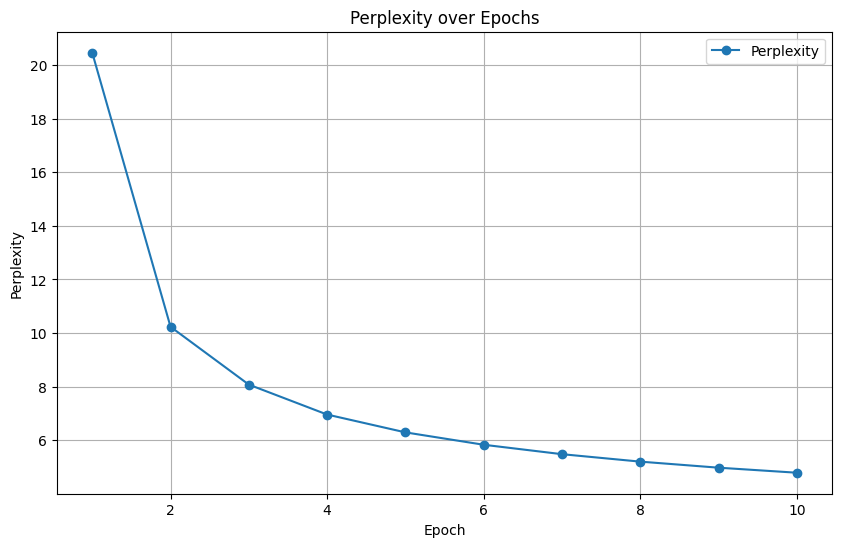

In [ ]:
# Построение графика перплексии
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), perplexity_callback.perplexity_values)
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()
plt.show()

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # predicted_logits.shape должно быть [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Беру последний предикт
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask

    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.chars_from_ids(predicted_ids)

    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['\n'])
result = [next_char]

for n in range(2000):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*100)
print('\nRun time:', end - start)


Ра-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-та-

Потери уменьшились с 3.02 до 1.57. Это указывает на успешное обучение модели, что подтверждается соответствующим снижением перплексити.

Текст конечно дурацкий, но я очень много времени потратил, чтобы достичь хотя бы того, что бы модель генерировала реальные слова, а не вымышленные. Пробовал разные модели, например gpt-2, было сильно хуже. На каникулах попробую докрутить до лучшего результата

Констант было мало, поэтому не стал отдельный конфиг файл создавать